# AvaStats

In [4]:
import xml.etree.ElementTree as ET
import os
from pathlib import Path
from IPython.display import clear_output

# - for reloading libraries/modules - #
import importlib

import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.colors import BoundaryNorm, ListedColormap
from matplotlib.ticker import AutoMinorLocator, FuncFormatter

if os.path.exists('latex_default.mplstyle'):
    plt.style.use('latex_default.mplstyle')

## I. Fetch Data (if necessary)

USE avastats.ipynb

## II: Install Packages from Subfolder/Subprojects

It may be a good idea to update the submodules sometimes. But it is also possible, that a breaking change in the submodules could also break the code below.

To initiate git submodules (first time) use:
- `git submodule init`

To install the Submodules use:
- `git submodule update`

Current tested Versions:

- pyAvaCore: Commit SHA e25c7bbc793a208c3c70ef3211cf4e0b169281d8

Then Install pyAvaCore with the line below:

In [2]:
# !{sys.executable} -m pip install -e pyAvaCore
# Alternatively run this command within avastats in the Terminal to install pyAvaCore

In [16]:
import avastats.avacore_connector
importlib.reload(avastats.avacore_connector)

# ------------------------------------ #
start_season = "2021-12-01" # as string with YYYY-MM-DD
end_season   = "2022-05-01" # as string with YYYY-MM-DD

regions_of_interest_axliz = ['AT-07-14'] # Euregio_regions are possible, e. g. ['AT-07', 'IT-32-BZ']
regions_of_interest_seegr = ['AT-07-04'] # Euregio_regions are possible, e. g. ['AT-07', 'IT-32-BZ']

avaProbs = [ "new_snow", "wind_drifted_snow", "persistent_weak_layers", "wet_snow", "gliding_snow", "cornice_failure"]
# ava_problems = [ "new_snow", "wind_drifted_snow", "persistent_weak_layers", "wet_snow", "gliding_snow", "cornice_failure", "favourable_situation" ]
# ------------------------------------ #
 
connector =  avastats.avacore_connector.AvacoreConnector()
local_dir = os.getcwd() + "/data/bulletins"
df_avaProbs_axliz, df_danger_level_axliz = connector.get_upper_danger_level_and_avalanche_Problems_for_region(local_dir,start_season,end_season,regions_of_interest_axliz,avaProbs)
df_avaProbs_seegr, df_danger_level_seegr = connector.get_upper_danger_level_and_avalanche_Problems_for_region(local_dir,start_season,end_season,regions_of_interest_seegr,avaProbs)

/var/folders/5n/r616r2rx3710m3kyf90_xwdr0000gn/T/ipykernel_88050/899140818.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(AVAPROBS_NAMES[::-1])


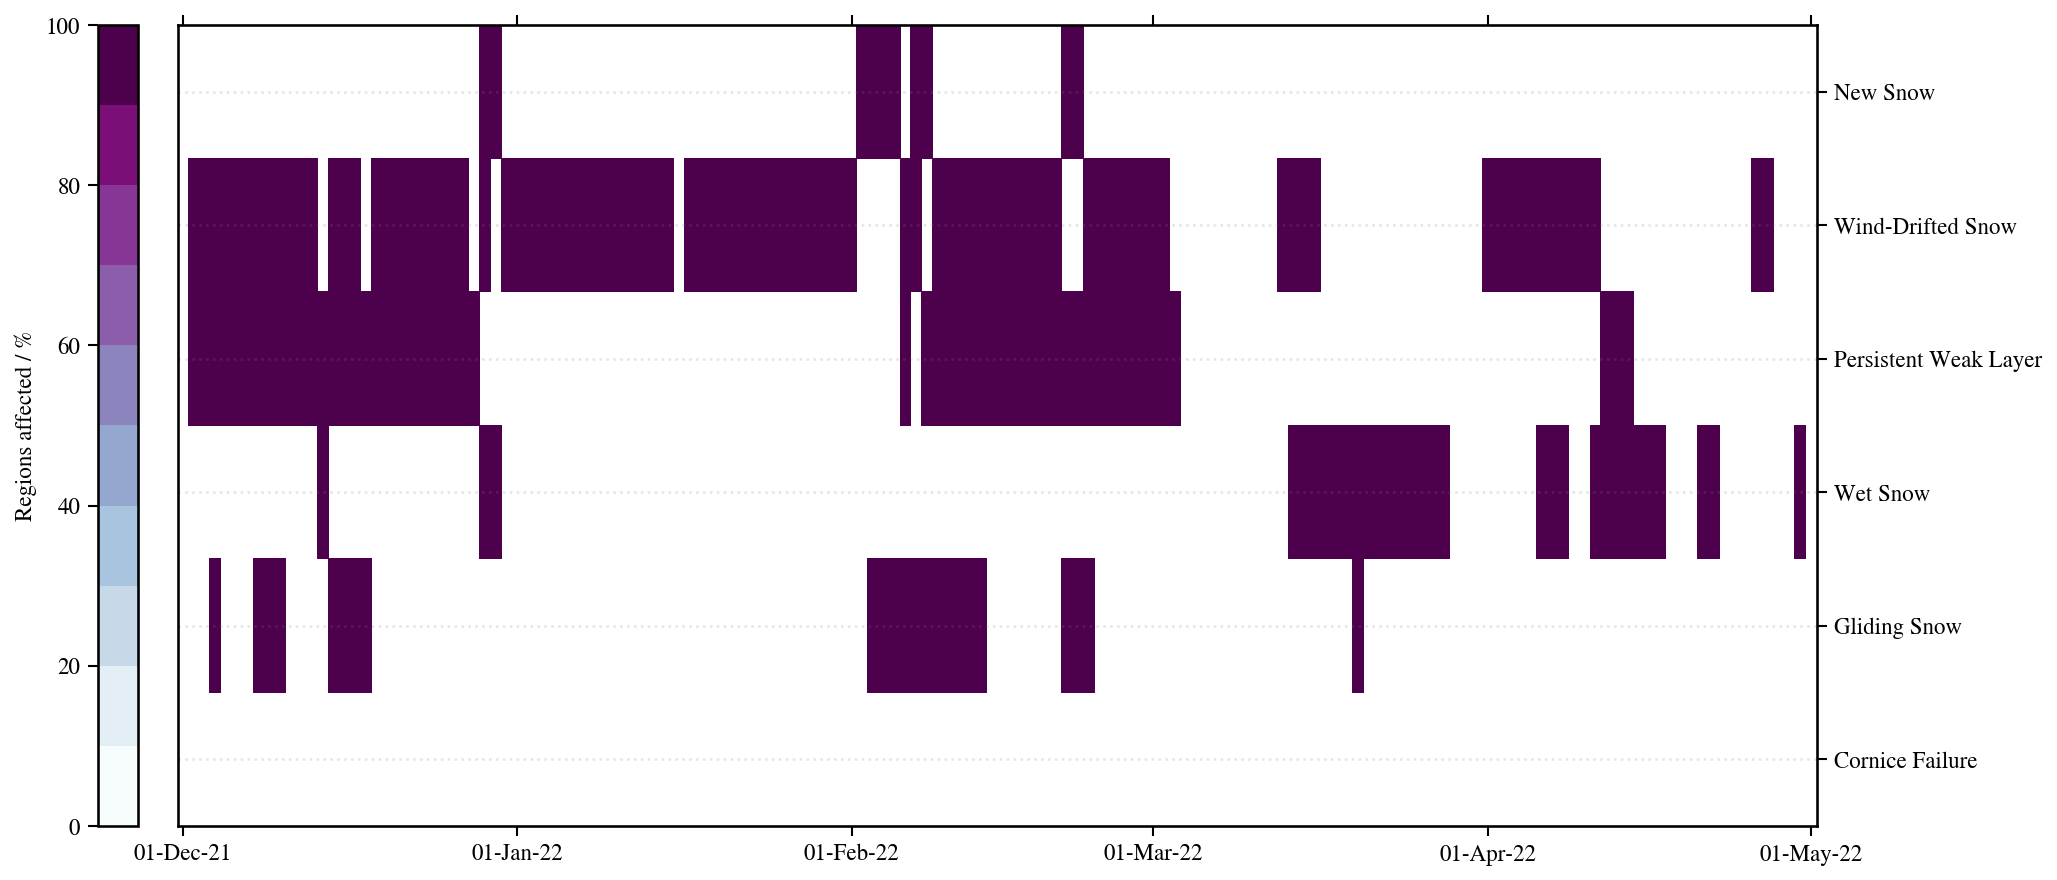

In [5]:
# - VISUALIZATION OF AVA PROBLEMS - #
df_avaProbs = df_avaProbs_axliz
fig, ax = plt.subplots(1,1,figsize=(15,6))

def plot_avalanche_problems_over_time(ax):
    data_temp = df_avaProbs.T.to_numpy()
    data = np.where(data_temp>1,data_temp,np.nan)
    data = data[::-1,:]

    AVAPROBS_NAMES = [ "New Snow", "Wind-Drifted Snow", "Persistent Weak Layer", "Wet Snow", "Gliding Snow", "Cornice Failure"]

    cmap = plt.get_cmap('BuPu')
    bounds = np.linspace(0,100,11)
    norm = BoundaryNorm(bounds,cmap.N)

    pcolor = ax.pcolor(df_avaProbs.index, avaProbs, data, shading='auto', cmap=cmap, norm=norm)
    cbar = fig.colorbar(pcolor, ax=ax, pad=0.02,location='left') # pad=0.02, shrink=0.67
    # cbar = fig.colorbar(pcolor, location='top',fraction=0.05, shrink=1) # pad=0.02, shrink=0.67
    cbar.set_label("Regions affected / %")

    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    ax.grid(axis='y')
    myLoc = mdates.MonthLocator()
    myFmt = mdates.DateFormatter('%d-%b-%y') # %Y-%b-%d
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_major_locator(myLoc)
    ax.set_yticklabels(AVAPROBS_NAMES[::-1])

    return ax

ax = plot_avalanche_problems_over_time(ax)

# --- Save figure --- #
filename  = 'avaProblems-over-seaon-axliz'
out_dir   = "output"
directory = Path(out_dir)
directory.mkdir(parents=True, exist_ok=True)
fig.tight_layout()
fig.savefig(f'{out_dir}/{filename}.png', facecolor='w', edgecolor='w',
            format='png', dpi=300)

/var/folders/5n/r616r2rx3710m3kyf90_xwdr0000gn/T/ipykernel_88050/511175798.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(AVAPROBS_NAMES[::-1])


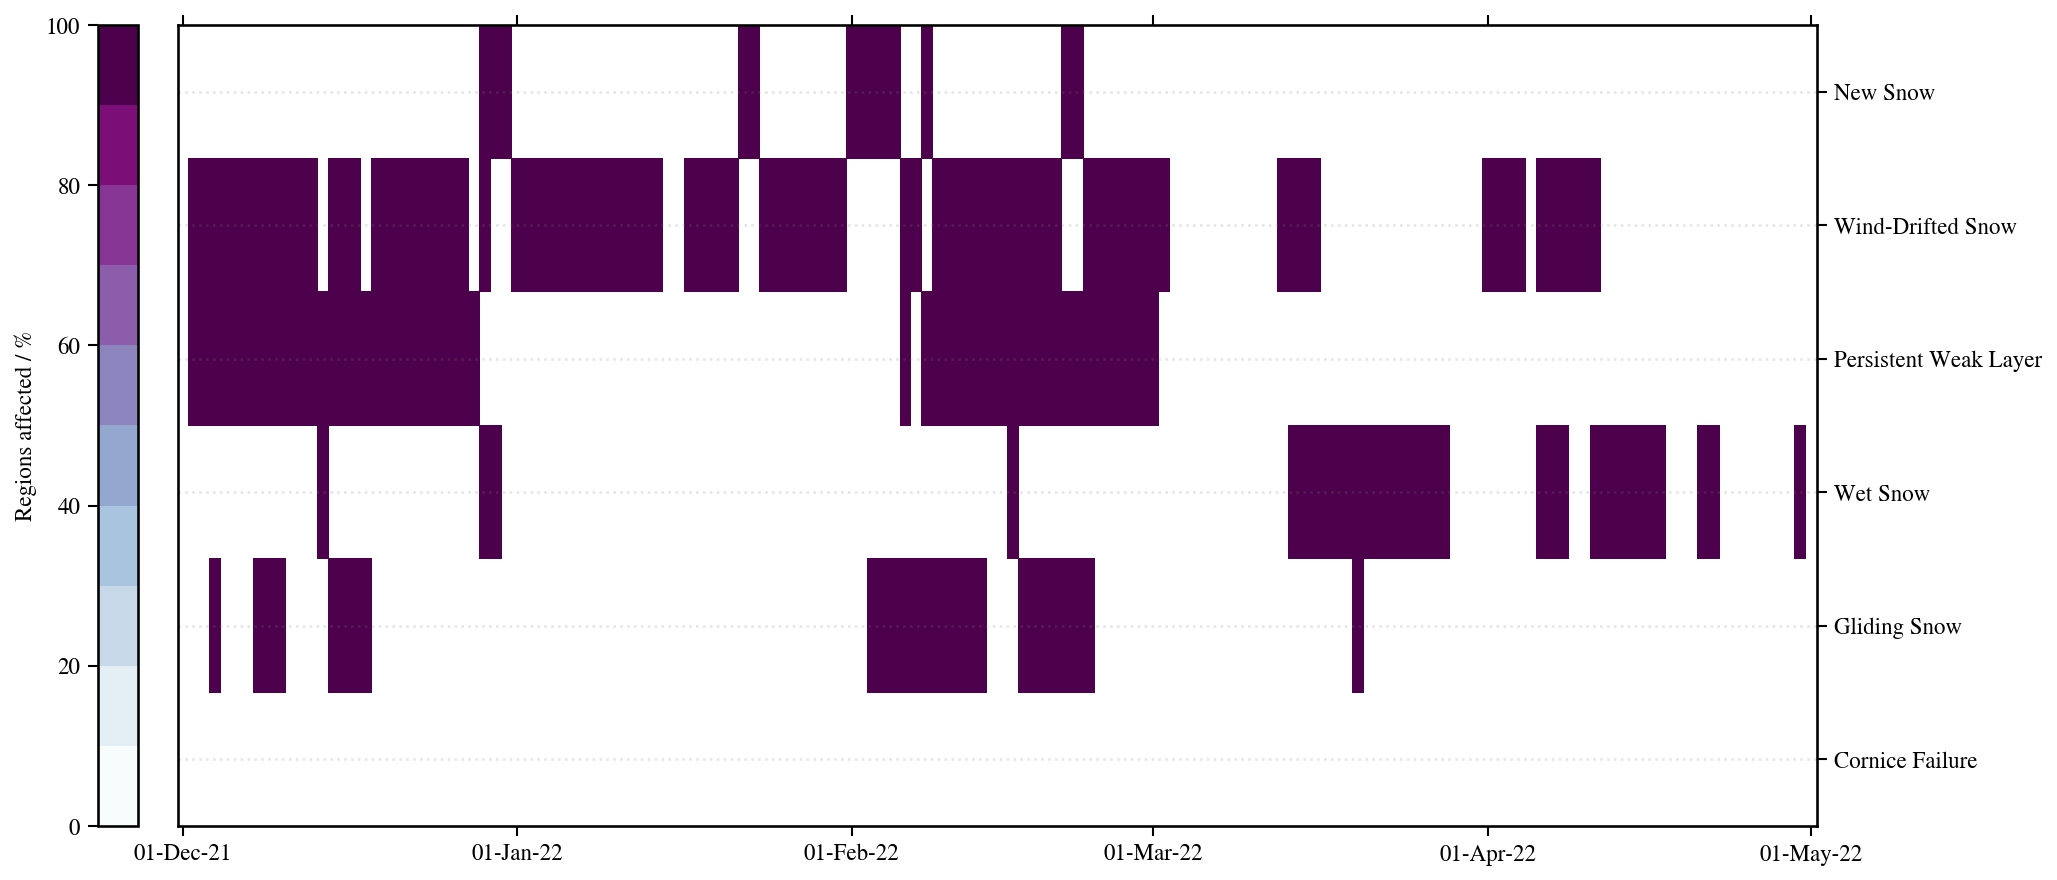

In [6]:
# - VISUALIZATION OF AVA PROBLEMS - #
df_avaProbs = df_avaProbs_seegr
fig, ax = plt.subplots(1,1,figsize=(15,6))

def plot_avalanche_problems_over_time(ax):
    data_temp = df_avaProbs.T.to_numpy()
    data = np.where(data_temp>1,data_temp,np.nan)
    data = data[::-1,:]

    AVAPROBS_NAMES = [ "New Snow", "Wind-Drifted Snow", "Persistent Weak Layer", "Wet Snow", "Gliding Snow", "Cornice Failure"]

    cmap = plt.get_cmap('BuPu')
    bounds = np.linspace(0,100,11)
    norm = BoundaryNorm(bounds,cmap.N)

    pcolor = ax.pcolor(df_avaProbs.index, avaProbs, data, shading='auto', cmap=cmap, norm=norm)
    cbar = fig.colorbar(pcolor, ax=ax, pad=0.02,location='left') # pad=0.02, shrink=0.67
    # cbar = fig.colorbar(pcolor, location='top',fraction=0.05, shrink=1) # pad=0.02, shrink=0.67
    cbar.set_label("Regions affected / %")

    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    ax.grid(axis='y')
    myLoc = mdates.MonthLocator()
    myFmt = mdates.DateFormatter('%d-%b-%y') # %Y-%b-%d
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_major_locator(myLoc)
    ax.set_yticklabels(AVAPROBS_NAMES[::-1])

    return ax

ax = plot_avalanche_problems_over_time(ax)

# --- Save figure --- #
filename  = 'avaProblems-over-seaon-seegr'
out_dir   = "output"
directory = Path(out_dir)
directory.mkdir(parents=True, exist_ok=True)
fig.tight_layout()
fig.savefig(f'{out_dir}/{filename}.png', facecolor='w', edgecolor='w',
            format='png', dpi=300)

<AxesSubplot:>

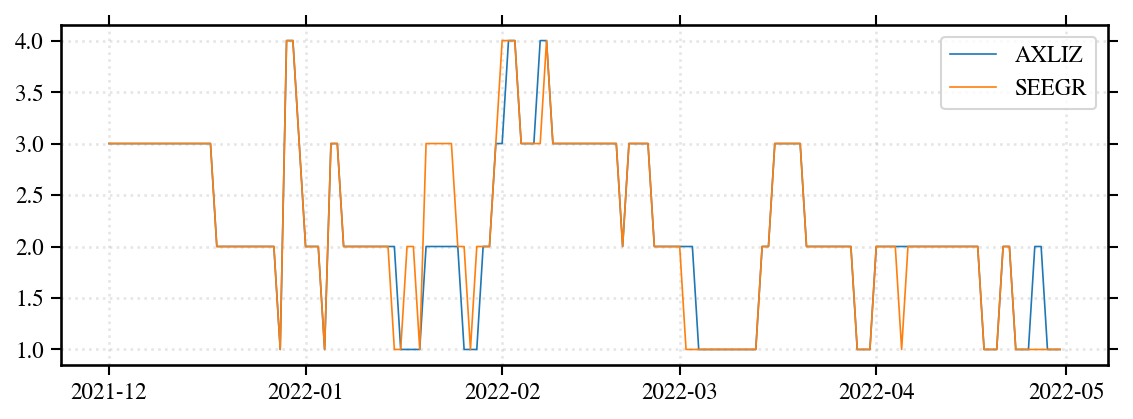

In [25]:
df_danger_level = df_danger_level_axliz
df_danger_level.rename(columns = {'danger_level':'AXLIZ'},inplace=True)
df_danger_level['SEEGR'] = df_danger_level_seegr['danger_level']
df_danger_level.plot(figsize=(9,3))

In [20]:
# - Save files to csv files - #
AVAPROBS_NAMES = [ "New Snow", "Wind-Drifted Snow", "Persistent Weak Layer", "Wet Snow", "Gliding Snow", "Cornice Failure"]
df_avaProbs_axliz.to_csv('output/avaProbs-axliz.csv', index_label='Date', header=AVAPROBS_NAMES, na_rep='NaN')
df_avaProbs_axliz.to_csv('output/avaProbs-seegr.csv', index_label='Date', header=AVAPROBS_NAMES, na_rep='NaN')
df_danger_level.to_csv('output/dangerLevels-axliz-seegr.csv', index_label='Date', na_rep='NaN')